📄 Dataset Preview:
   Temperature  Humidity  Pressure  WindSpeed  CloudCoverage  Rain
0    -0.038769 -0.649239 -0.224746  -1.346275       0.126879     0
1     1.005284 -1.373239  1.157346   0.126493       1.422799     0
2    -0.742455 -0.573257  1.688442  -2.588237       0.762562     0
3    -1.587158  1.758582 -0.930664   0.764614       2.415399     1
4     0.195806 -0.058897 -0.549360   0.777375       1.147261     1

✅ Accuracy Score: 0.965

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        87
           1       0.99      0.95      0.97       113

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



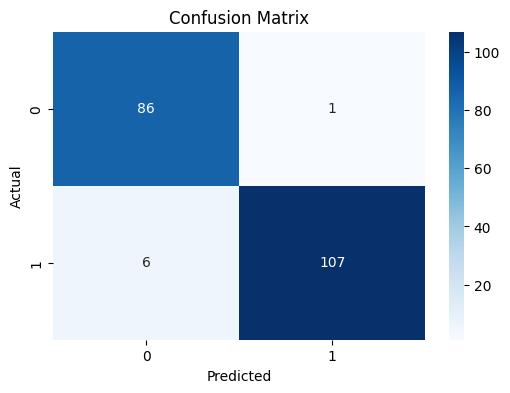

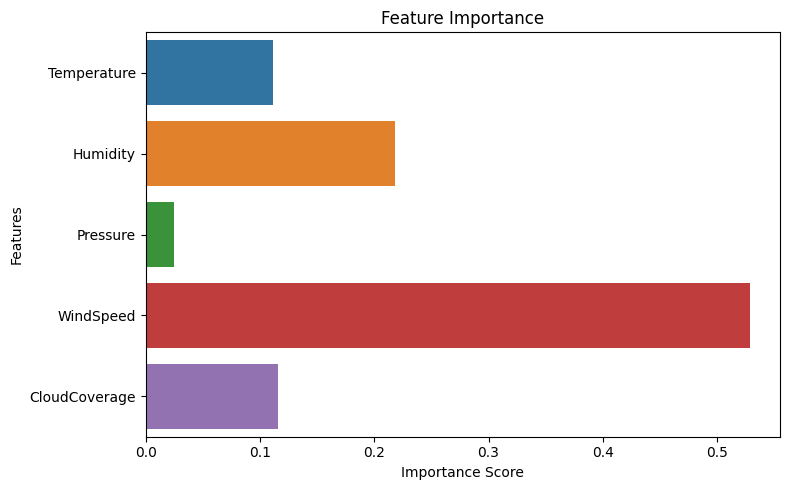

🎉 Rainfall Classifier executed successfully!


In [1]:
# Rainfall Classifier - Complete Kaggle Notebook Code

# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# 📂 Step 2: Load Dataset (replace this with your own CSV on Kaggle)
# Let's generate a synthetic dataset if no file is available

try:
    data = pd.read_csv('/kaggle/input/rainfall-prediction-dataset/rainfall.csv')
except:
    # Create synthetic data
    from sklearn.datasets import make_classification
    X_synthetic, y_synthetic = make_classification(n_samples=1000, n_features=5,
                                                    n_informative=3, n_redundant=1,
                                                    n_classes=2, random_state=42)
    data = pd.DataFrame(X_synthetic, columns=['Temperature', 'Humidity', 'Pressure', 'WindSpeed', 'CloudCoverage'])
    data['Rain'] = y_synthetic

print("📄 Dataset Preview:")
print(data.head())

# 🧹 Step 3: Preprocess Data
if data['Rain'].dtype == 'object':
    data['Rain'] = LabelEncoder().fit_transform(data['Rain'])  # Yes/No → 1/0

X = data.drop('Rain', axis=1)
y = data['Rain']

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Step 4: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📊 Step 5: Evaluate Model
y_pred = model.predict(X_test)

print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# 📉 Step 6: Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🎯 Step 7: Feature Importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# ✅ All Done!
print("🎉 Rainfall Classifier executed successfully!")